In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2022-05-30 14:38:31.818355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 14:38:31.818381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 182s 1us/step


In [3]:
print(data_dir)

/home/groot/.keras/datasets/flower_photos


/home/groot/.keras/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg


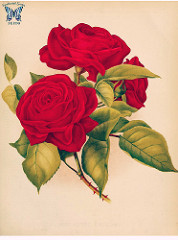

In [4]:
#lets print a flower
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [5]:
img_height,img_width = 180,180
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",
                                                               seed=123,image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2022-05-30 15:04:24.466445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-30 15:04:24.466471: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-30 15:04:24.466488: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omen15): /proc/driver/nvidia/version does not exist
2022-05-30 15:04:24.466724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


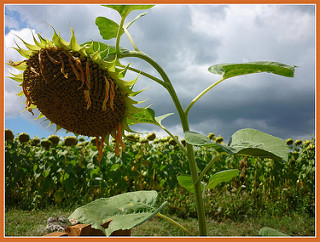

In [10]:
sf = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sf[3]))

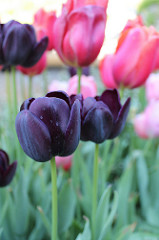

In [11]:
tulip = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulip[2]))

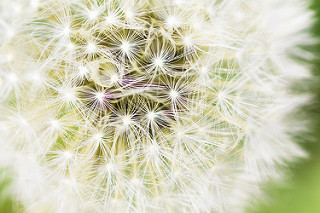

In [13]:
dd = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dd[6]))

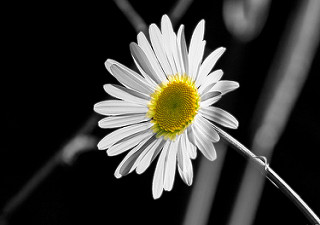

In [14]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[7]))

In [17]:
class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


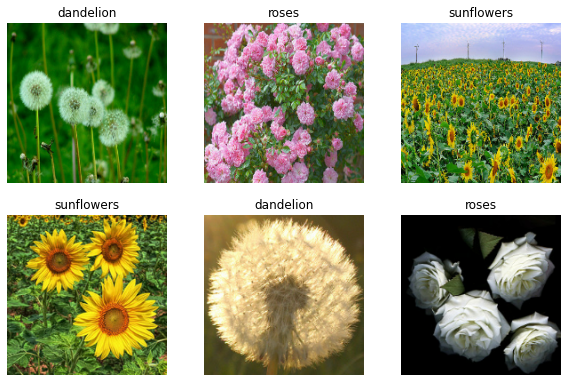

In [18]:
plt.figure(figsize = (10,10))
for images , labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(180,180,3),pooling='avg',
                                                    classes=5,weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5,activation ='softmax'))

94765736/94765736 [==============================] - 74s 1us/step


In [20]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [30]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

In [26]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
epochs=10
history = resnet_model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 171s 2s/step - loss: 0.6978 - accuracy: 0.7786 - val_loss: 0.4207 - val_accuracy: 0.8529
Epoch 2/10
92/92 [==============================] - 177s 2s/step - loss: 0.2748 - accuracy: 0.9029 - val_loss: 0.3134 - val_accuracy: 0.8638
Epoch 3/10
92/92 [==============================] - 165s 2s/step - loss: 0.1447 - accuracy: 0.9540 - val_loss: 0.3261 - val_accuracy: 0.8842
Epoch 4/10
92/92 [==============================] - 148s 2s/step - loss: 0.0931 - accuracy: 0.9741 - val_loss: 0.3895 - val_accuracy: 0.8529
Epoch 5/10
92/92 [==============================] - 149s 2s/step - loss: 0.0566 - accuracy: 0.9874 - val_loss: 0.3606 - val_accuracy: 0.8815
Epoch 6/10
92/92 [==============================] - 145s 2s/step - loss: 0.0357 - accuracy: 0.9928 - val_loss: 0.3787 - val_accuracy: 0.8856
Epoch 7/10
92/92 [==============================] - 144s 2s/step - loss: 0.0169 - accuracy: 0.9983 - val_loss: 0.3723 - val_accuracy: 0.8828
Epoch 8/10
92

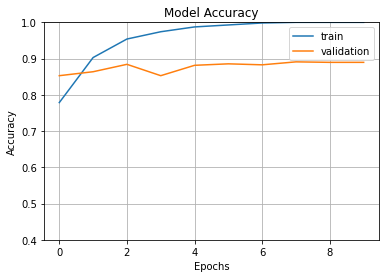

In [32]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

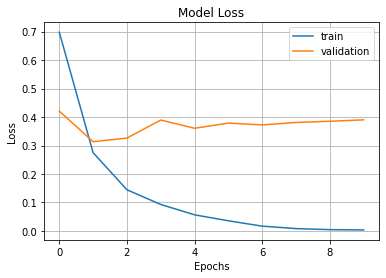

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [35]:
import cv2
image = cv2.imread(str(roses[0]))
image_resized = cv2.resize(image, (img_height,img_width))
image = np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [36]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 717ms/step
[[3.0912520e-07 2.2333303e-08 9.9980229e-01 3.0413175e-06 1.9423230e-04]]


In [37]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
